In [1]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta


fake = Faker('zh_CN')
Faker.seed(42)


def generate_erp_order_data(num_records=1000):
    data = []

    status_options = ["已下单", "已付款", "已发货", "已完成", "已取消"]
    sub_order_status_options = ["待付款", "已付款", "已发货", "已完成", "已取消"]
    refund_status_options = ["未退款", "部分退款", "全额退款"]
    platforms = ["淘宝", "京东", "拼多多", "抖音商城", "快手小店", "官网"]
    provinces = ["北京市", "上海市", "广东省", "江苏省", "浙江省", "四川省", "山东省", "河南省", "湖北省", "湖南省"]
    cities = {
        "北京市": ["北京市"],
        "上海市": ["上海市"],
        "广东省": ["广州市", "深圳市", "东莞市", "佛山市"],
        "江苏省": ["南京市", "苏州市", "无锡市", "常州市"],
        "浙江省": ["杭州市", "宁波市", "温州市", "绍兴市"],
        "四川省": ["成都市", "绵阳市", "德阳市"],
        "山东省": ["济南市", "青岛市", "烟台市"],
        "河南省": ["郑州市", "洛阳市", "开封市"],
        "湖北省": ["武汉市", "宜昌市", "襄阳市"],
        "湖南省": ["长沙市", "株洲市", "湘潭市"]
    }
    
    # 服装类商品信息
    product_categories = ["T恤", "衬衫", "裤子", "裙子", "外套", "毛衣", "卫衣", "夹克"]
    colors = ["黑色", "白色", "红色", "蓝色", "绿色", "黄色", "灰色", "粉色"]
    sizes = ["S", "M", "L", "XL", "XXL"]
    brands = ["优衣库", "ZARA", "H&M", "李宁", "安踏", "森马", "美特斯邦威", "太平鸟"]
    

    user_ids = [fake.uuid4() for _ in range(200)]  # 200个用户ID，会重复使用
    
    for i in range(num_records):

        order_id = i + 1
        internal_order_num = f"IN{fake.random_int(10000000, 99999999)}"
        online_order_num = f"ON{fake.random_int(10000000, 99999999)}"
        store_name = f"{random.choice(brands)}官方旗舰店"
        user_id = random.choice(user_ids)

        order_time = fake.date_time_between(start_date='-1y', end_date='now')
        
        if random.random() < 0.8: 
            payment_date = fake.date_time_between(start_date=order_time, end_date=order_time + timedelta(days=3))
        else:
            payment_date = None

        shipping_date = None
        if payment_date and random.random() < 0.9:
            shipping_date = fake.date_time_between(start_date=payment_date, end_date=payment_date + timedelta(days=5))
        

        unit_price = round(random.uniform(59.9, 599.9), 2)
        original_price = round(unit_price * random.uniform(1.05, 1.5), 2)
        quantity = random.randint(1, 5)
        product_amount = round(unit_price * quantity, 2)
        payable_amount = product_amount
        paid_amount = payable_amount if payment_date else 0
        
        # 订单状态
        status = random.choice(status_options)
        if status == "已取消" and payment_date:
            paid_amount = round(paid_amount * random.uniform(0.5, 1), 2)
        
        # 收货信息
        consignee = fake.name()
        province = random.choice(provinces)
        city = random.choice(cities[province])
        
        # 商品信息
        category = random.choice(product_categories)
        color = random.choice(colors)
        size = random.choice(sizes)
        product_name = f"{random.choice(brands)} {category}"
        color_and_spec = f"{color}/{size}"
        
        # 编码信息
        spu = f"SPU{fake.random_int(10000, 99999)}"
        sku = f"SKU{fake.random_int(100000, 999999)}"
        
        # 子订单信息
        sub_order_number = f"SO{fake.random_int(10000000, 99999999)}"
        online_sub_order_number = f"OS{fake.random_int(10000000, 99999999)}"
        original_online_order_number = online_order_num if random.random() < 0.9 else f"ON{fake.random_int(10000000, 99999999)}"
        
        # 其他状态
        sub_order_status = random.choice(sub_order_status_options)
        refund_status = random.choice(refund_status_options)
        
        # 数量信息
        registered_quantity = quantity
        actual_refund_quantity = random.randint(0, quantity) if refund_status != "未退款" else 0
        
        # 是否赠品
        is_gift = "是" if random.random() < 0.05 else "否"
        if is_gift == "是":
            unit_price = 0
            product_amount = 0
            payable_amount = round(payable_amount, 2)
        
        # 平台信息
        platform = random.choice(platforms)
        
        # 添加到数据列表
        data.append({
            "id": order_id,
            "internal_order_number": internal_order_num,
            "online_order_number": online_order_num,
            "store_name": store_name,
            "full_channel_user_id": user_id,
            "shipping_date": shipping_date.strftime("%Y-%m-%d %H:%M:%S") if shipping_date else None,
            "payment_date": payment_date.strftime("%Y-%m-%d %H:%M:%S") if payment_date else None,
            "payable_amount": payable_amount,
            "paid_amount": paid_amount,
            "status": status,
            "consignee": consignee,
            "spu": spu,
            "order_time": order_time.strftime("%Y-%m-%d %H:%M:%S"),
            "province": province,
            "city": city,
            "platform": platform,
            "sub_order_number": sub_order_number,
            "online_sub_order_number": online_sub_order_number,
            "original_online_order_number": original_online_order_number,
            "sku": sku,
            "quantity": quantity,
            "unit_price": unit_price,
            "product_name": product_name,
            "color_and_spec": color_and_spec,
            "product_amount": product_amount,
            "original_price": original_price,
            "is_gift": is_gift,
            "sub_order_status": sub_order_status,
            "refund_status": refund_status,
            "registered_quantity": registered_quantity,
            "actual_refund_quantity": actual_refund_quantity
        })
    
    return data

# 生成1000条数据
erp_order_data = generate_erp_order_data(1000)

# 转换为DataFrame
df = pd.DataFrame(erp_order_data)

# 保存到Excel
output_file = "erp_order_data.xlsx"
df.to_excel(output_file, index=False)

print(f"成功生成1000条ERP订单数据，已保存到 {output_file}")

成功生成1000条ERP订单数据，已保存到 erp_order_data.xlsx


可视化图表已保存至：D:\python\新建文件夹\erp_order_visualization.png
图表包含：订单状态分布、平台销售排名、省份订单分布、月度趋势、商品类型销售、付款金额分布


✅ 成功读取文件：D:\python\新建文件夹\erp_order_data.xlsx
📊 数据总行数：1000，涉及平台数：6
📸 图表1已保存至：D:\python\新建文件夹\各平台支付金额渐变柱形图.png
📸 图表2已保存至：D:\python\新建文件夹\Top10省份订单数渐变柱形图.png
🎉 所有图表生成完成！


✅ 成功读取文件，数据总行数：1000
📅 2025年3月有效订单数：81，涉及省份数：10
🎉 3月各区域销量分布图已保存至：D:\python\新建文件夹\2025年3月各区域销量分布图.png
📊 图表核心信息：Top1销量省份为北京市，销量37件


SyntaxError: invalid character '）' (U+FF09) (420715537.py, line 33)

✅ 成功读取文件，总数据量：1000行
📅 3月有效订单：81行，涉及省份：10个
📊 正在显示3月各区域销量分布图...


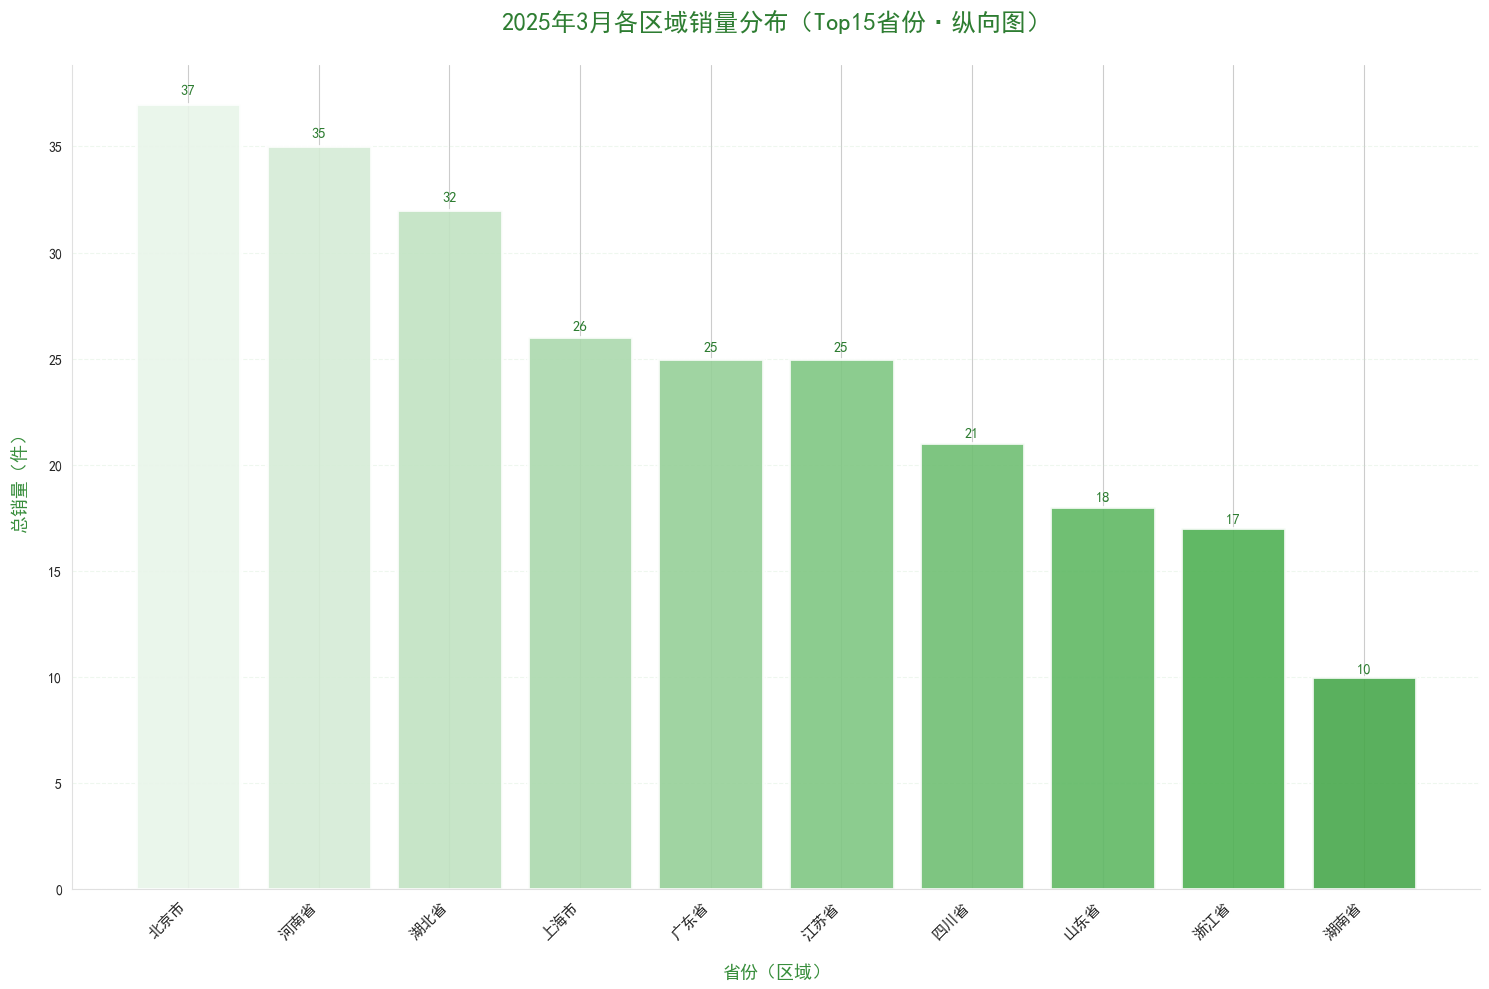


🏆 3月销量Top3省份：
   1. 北京市：37件
   2. 河南省：35件
   3. 湖北省：32件


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (15, 10)

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"
try:
    df = pd.read_excel(file_path, engine='openpyxl')
    df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
    print(f"✅ 成功读取文件，总数据量：{len(df)}行")
    
    df_march = df[
        (df['order_time'].dt.year == 2025) &
        (df['order_time'].dt.month == 3) &
        (df['quantity'] > 0)
    ].copy()
    
    if len(df_march) == 0:
        print("❌ 未找到2025年3月有效订单，请检查数据中'order_time'字段格式")
        exit()
    print(f"📅 3月有效订单：{len(df_march)}行，涉及省份：{df_march['province'].nunique()}个")

except FileNotFoundError:
    print(f"❌ 文件未找到！请确认路径：{file_path}")
    exit()
except Exception as e:
    print(f"❌ 数据处理失败：{str(e)}")
    exit()

province_sales = df_march.groupby('province')['quantity'].sum().sort_values(ascending=False)
top15_province_sales = province_sales.head(15) if len(province_sales) >= 15 else province_sales

gradient_colors = ['#E8F5E9', '#C8E6C9', '#A5D6A7', '#81C784', '#66BB6A', '#4CAF50', '#43A047']
custom_cmap = LinearSegmentedColormap.from_list('sales_green', gradient_colors, N=100)
bar_colors = [custom_cmap(i / len(top15_province_sales)) for i in range(len(top15_province_sales))]

fig, ax = plt.subplots()

bars = ax.bar(
    x=range(len(top15_province_sales)),
    height=top15_province_sales.values,
    color=bar_colors,
    edgecolor='white',
    linewidth=2,
    alpha=0.9
)

ax.set_xticks(range(len(top15_province_sales)))
ax.set_xticklabels(
    top15_province_sales.index,
    rotation=45,
    ha='right',
    fontsize=11,
    fontweight='light'
)

ax.set_title('2025年3月各区域销量分布（Top15省份·纵向图）',
             fontsize=18, fontweight='bold', pad=25, color='#2E7D32')
ax.set_xlabel('省份（区域）', fontsize=13, fontweight='bold', color='#388E3C', labelpad=15)
ax.set_ylabel('总销量（件）', fontsize=13, fontweight='bold', color='#388E3C', labelpad=15)

for bar, value in zip(bars, top15_province_sales.values):
    ax.text(
        x=bar.get_x() + bar.get_width()/2,
        y=bar.get_height() + bar.get_height()*0.01,
        s=f'{value:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10.5,
        fontweight='bold',
        color='#2E7D32'
    )

ax.yaxis.grid(True, alpha=0.3, linestyle='--', color='#C8E6C9')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#E0E0E0')
ax.spines['bottom'].set_color('#E0E0E0')

plt.tight_layout()

print("📊 正在显示3月各区域销量分布图...")
plt.show()

print("\n🏆 3月销量Top3省份：")
for i, (province, sales) in enumerate(top15_province_sales.head(3).items(), 1):
    print(f"   {i}. {province}：{sales:,.0f}件")

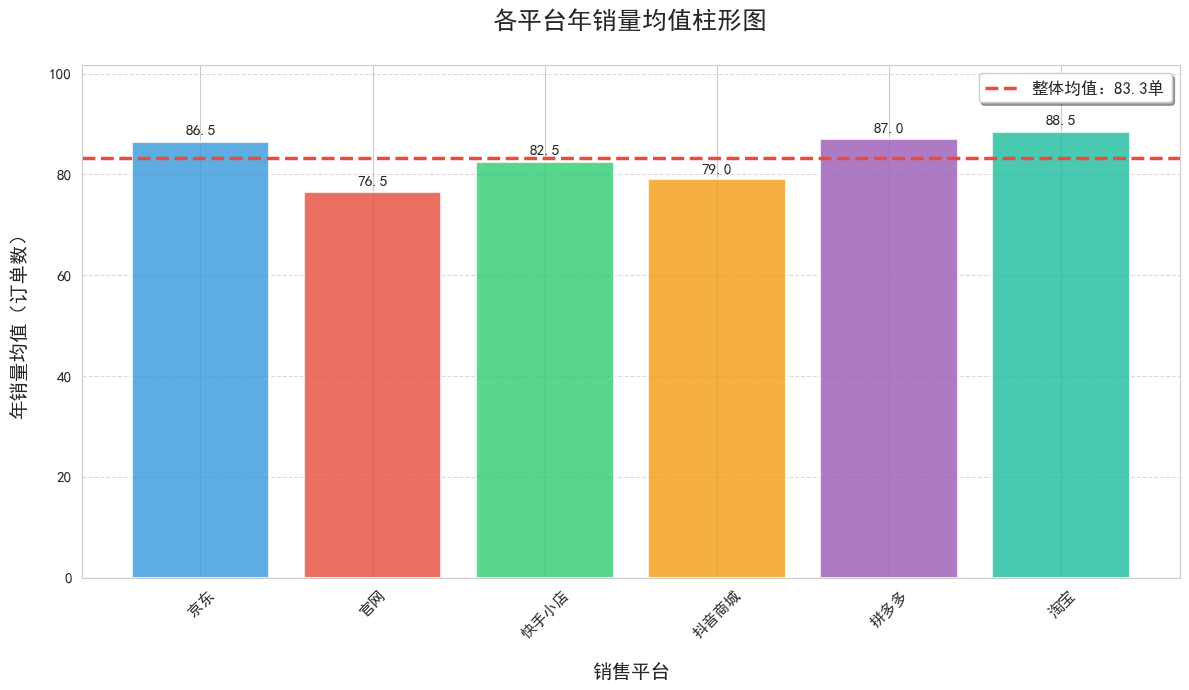

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "D:\\python\\新建文件夹\\erp_order_data.xlsx"
df = pd.read_excel(file_path)

order_id_col = "online_order_number"
platform_col = "platform"
date_col = "order_time"

df_clean = df[[order_id_col, platform_col, date_col]].dropna()
df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')
df_clean = df_clean.dropna(subset=[date_col])
df_clean['年份'] = df_clean[date_col].dt.year

yearly_platform_sales = df_clean.groupby(['年份', platform_col])[order_id_col].count().reset_index()
yearly_platform_sales.rename(columns={order_id_col: "年销量"}, inplace=True)

platform_yearly_avg = yearly_platform_sales.groupby(platform_col)['年销量'].mean().reset_index()
overall_avg = platform_yearly_avg['年销量'].mean()

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(12, 7))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#34495e']

bars = ax.bar(
    platform_yearly_avg[platform_col],
    platform_yearly_avg['年销量'],
    color=colors[:len(platform_yearly_avg)],
    alpha=0.8,
    edgecolor='white',
    linewidth=1.5
)

ax.axhline(y=overall_avg, color='#e74c3c', linestyle='--', linewidth=2.5, label=f'整体均值：{overall_avg:.1f}单')

ax.set_title('各平台年销量均值柱形图', fontsize=18, fontweight='bold', pad=25)
ax.set_xlabel('销售平台', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('年销量均值（订单数）', fontsize=14, fontweight='bold', labelpad=15)

ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=11)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height + max(platform_yearly_avg['年销量']) * 0.01,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

ax.grid(axis='y', linestyle='--', alpha=0.3, color='#888888', linewidth=0.8)
ax.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)

ax.set_ylim(0, max(platform_yearly_avg['年销量']) * 1.15)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (11, 7)  
plt.rcParams['figure.dpi'] = 100  


file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

required_cols = ['product_name', 'quantity']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"❌ 缺少必要列：{missing_cols}")
    print(f"✅ 数据实际列名：{df.columns.tolist()}")
    exit()

product_sales = df.groupby('product_name')['quantity'].sum().reset_index()
product_sales = product_sales.sort_values('quantity', ascending=False).head(8)

gradient_colors = ['#80E2E7', '#40C4CC', '#00BCD4', '#00ACC1', '#0097A7', '#00838F']
custom_cmap = LinearSegmentedColormap.from_list('sales_teal', gradient_colors, N=100)

bar_colors = [custom_cmap(i / len(product_sales)) for i in range(len(product_sales))]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#1A1E2C')
ax.set_facecolor('#1A1E2C')


bar_width = 0.85  
for i, (_, row) in enumerate(product_sales.iterrows()):
    bbox = FancyBboxPatch(
        (i - bar_width/2, 0), 
        bar_width, row['quantity'], 
        boxstyle=f"round,pad=0.02,rounding_size={bar_width*0.8}",
        color=bar_colors[i],  
        alpha=0.95 
    )
    ax.add_patch(bbox)


for i, sales in enumerate(product_sales['quantity']):
    ax.text(
        x=i,
        y=sales + sales*0.012,  
        s=f'{sales:,.0f}',     
        ha='center', va='bottom',
        color='white',
        fontsize=9.5,  
        fontweight='bold',
        bbox=dict(facecolor='#2D3446', edgecolor='none', pad=2.2, alpha=0.8)
    )


ax.set_xticks(range(len(product_sales)))
ax.set_xticklabels(
    product_sales['product_name'],
    color='white',
    fontsize=10,
    rotation=38, 
    ha='right'
)
ax.set_ylabel('总销量（件）', color='white', fontsize=11.5, labelpad=9)  # 减少标签间距
ax.set_title(
    '2025年3月Top8商品销量分布（渐变圆角图）',
    color='white',
    fontsize=15,
    fontweight='bold',
    pad=18 
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#4E5969')
ax.spines['bottom'].set_color('#4E5969')

y_max = product_sales['quantity'].max() * 1.1
ax.set_ylim(0, y_max)

ax.yaxis.grid(True, linestyle='--', alpha=0.25, color='#4E5969')
ax.set_axisbelow(True)

plt.tight_layout(pad=1.8)

plt.show()

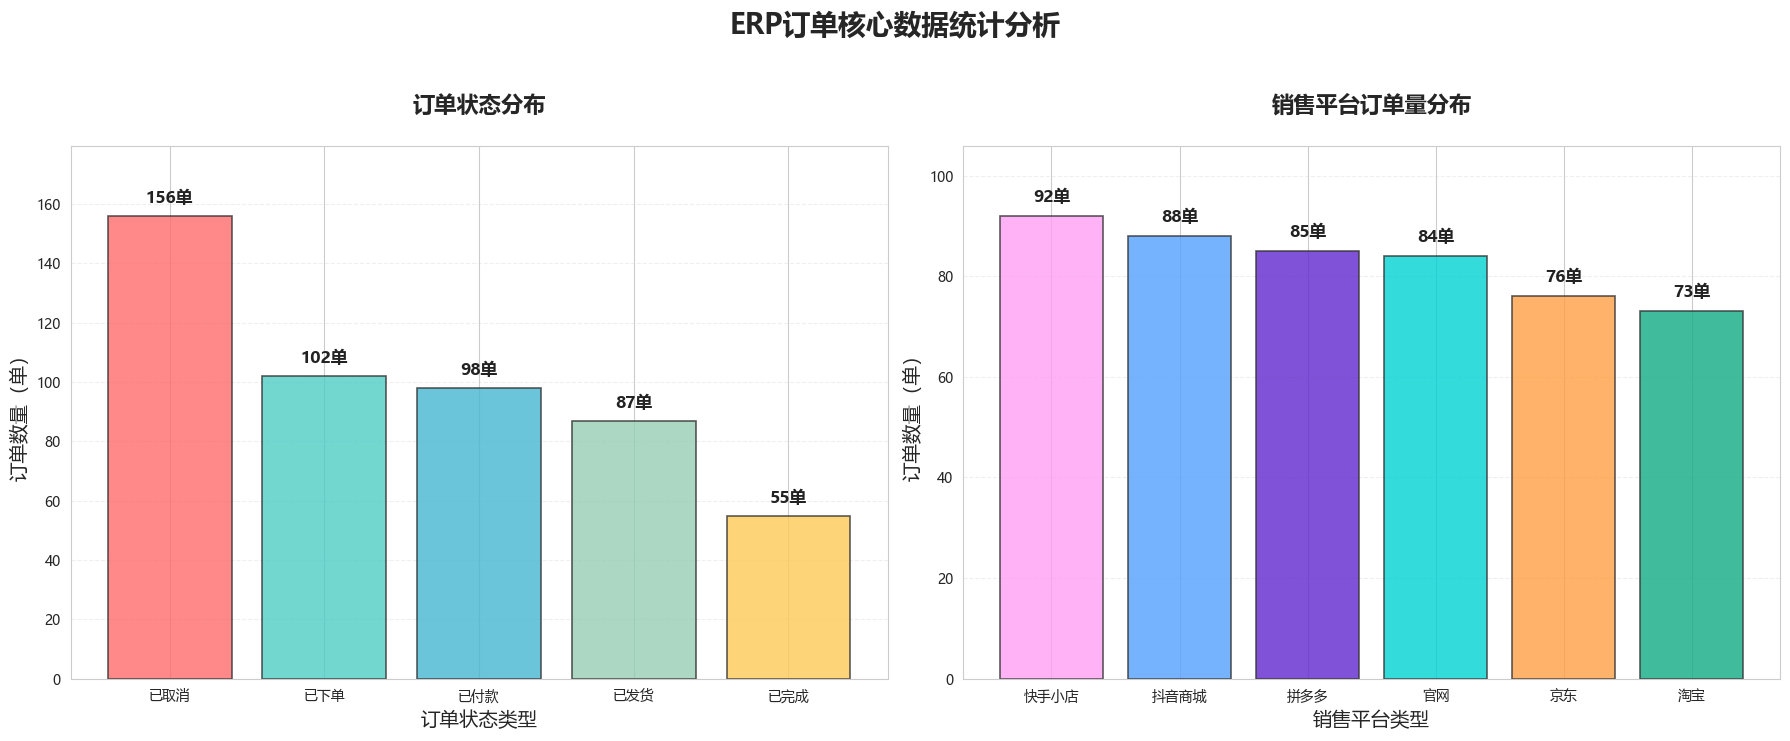

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

data = {
    '订单状态': ['已取消', '已下单', '已付款', '已发货', '已完成'],
    '订单数量_状态': [156, 102, 98, 87, 55],
    '销售平台': ['快手小店', '抖音商城', '拼多多', '官网', '京东', '淘宝'],
    '订单数量_平台': [92, 88, 85, 84, 76, 73]
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('ERP订单核心数据统计分析', fontsize=20, fontweight='bold', y=0.95)

colors1 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
bars1 = ax1.bar(
    x=data['订单状态'],
    height=data['订单数量_状态'],
    color=colors1,
    alpha=0.8,
    edgecolor='#333333',
    linewidth=1.2
)
ax1.set_title('订单状态分布', fontsize=16, fontweight='bold', pad=25)
ax1.set_ylabel('订单数量（单）', fontsize=14, fontweight='500')
ax1.set_xlabel('订单状态类型', fontsize=14, fontweight='500')
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax1.set_ylim(0, max(data['订单数量_状态']) * 1.15)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        x=bar.get_x() + bar.get_width()/2,
        y=height + 3,
        s=f'{int(height)}单',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='#222222'
    )

colors2 = ['#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43', '#10AC84']
bars2 = ax2.bar(
    x=data['销售平台'],
    height=data['订单数量_平台'],
    color=colors2,
    alpha=0.8,
    edgecolor='#333333',
    linewidth=1.2
)
ax2.set_title('销售平台订单量分布', fontsize=16, fontweight='bold', pad=25)
ax2.set_ylabel('订单数量（单）', fontsize=14, fontweight='500')
ax2.set_xlabel('销售平台类型', fontsize=14, fontweight='500')
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax2.set_ylim(0, max(data['订单数量_平台']) * 1.15)

for bar in bars2:
    height = bar.get_height()
    ax2.text(
        x=bar.get_x() + bar.get_width()/2,
        y=height + 2,
        s=f'{int(height)}单',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='#222222'
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.92])

plt.show()

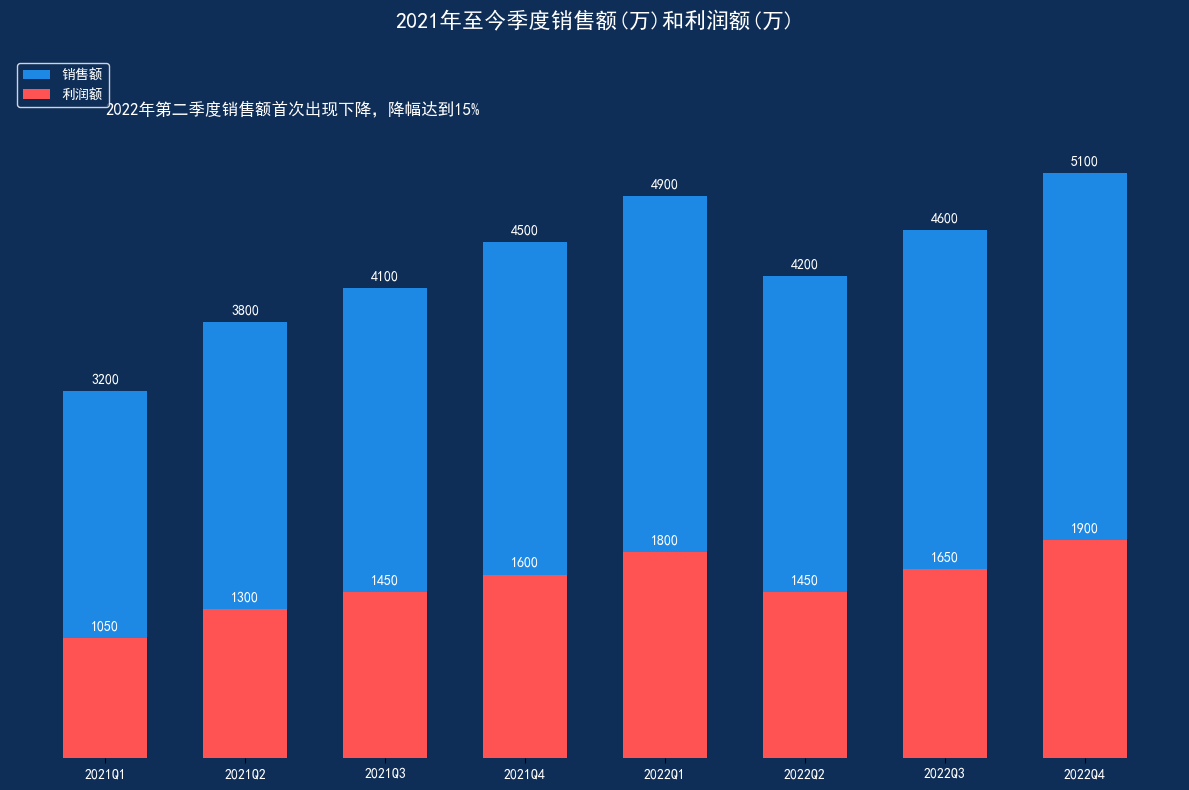

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.sans-serif"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams['axes.unicode_minus'] = False 


quarters = ['2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4']
sales = [3200, 3800, 4100, 4500, 4900, 4200, 4600, 5100]
profits = [1050, 1300, 1450, 1600, 1800, 1450, 1650, 1900] 


fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#0F2E57')
ax.set_facecolor('#0F2E57')

bar_width = 0.6
x = np.arange(len(quarters))
ax.bar(x, sales, width=bar_width, label='销售额', color='#1E88E5', edgecolor='none')
ax.bar(x, profits, width=bar_width, label='利润额', color='#FF5252', edgecolor='none')

for i in range(len(quarters)):

    ax.text(x[i], sales[i] + 50, f'{sales[i]}', ha='center', va='bottom', 
            color='white', fontsize=10, fontweight='bold')

    ax.text(x[i], profits[i] + 50, f'{profits[i]}', ha='center', va='bottom', 
            color='white', fontsize=10, fontweight='bold')


ax.set_title('2021年至今季度销售额(万)和利润额(万)', 
             color='white', fontsize=16, fontweight='bold', pad=20)
ax.text(0, max(sales)*1.1, '2022年第二季度销售额首次出现下降，降幅达到15%', 
        color='white', fontsize=12, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(quarters, color='white', fontsize=10)
ax.set_ylim(0, max(sales)*1.2)
ax.set_yticks([]) 

for spine in ax.spines.values():
    spine.set_visible(False)

legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='#1E88E5', edgecolor='none', label='销售额'),
    plt.Rectangle((0,0),1,1, facecolor='#FF5252', edgecolor='none', label='利润额')
]
ax.legend(handles=legend_elements, loc='upper left', 
          facecolor='#0F2E57', edgecolor='white', labelcolor='white')

plt.tight_layout()

plt.savefig('quarterly_sales_profit.png', dpi=300, bbox_inches='tight')
plt.show()

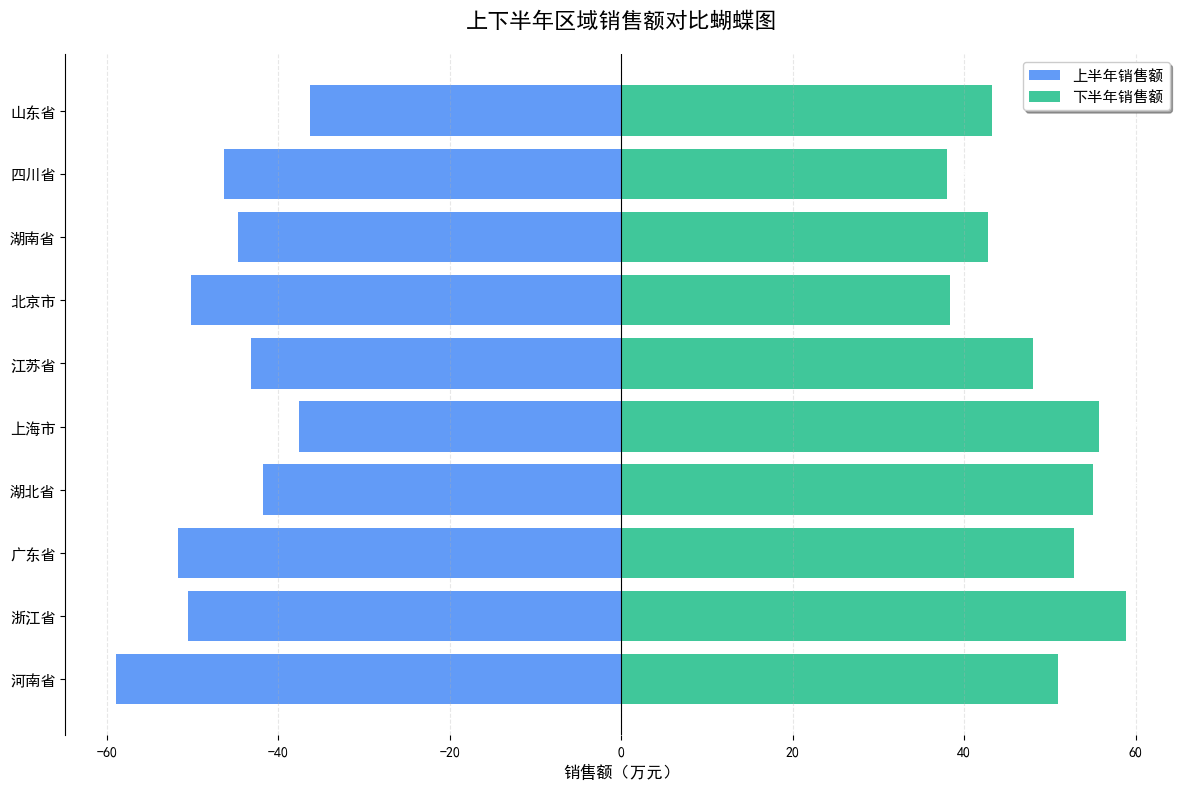

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams['axes.unicode_minus'] = False

data = {
    '区域': ['河南省', '浙江省', '广东省', '湖北省', '上海市', '江苏省', '北京市', '湖南省', '四川省', '山东省'],
    '上半年销售额(万元)': [58.95, 50.57, 51.69, 41.80, 37.62, 43.19, 50.25, 44.71, 46.39, 36.32],
    '下半年销售额(万元)': [50.88, 58.86, 52.75, 55.00, 55.73, 48.00, 38.39, 42.75, 37.94, 43.18]
}
df = pd.DataFrame(data)

df['上半年销售额(万元)_负'] = -df['上半年销售额(万元)']

fig, ax = plt.subplots(figsize=(12, 8))

color_first = '#3B82F6'
color_second = '#10B981'

ax.barh(df['区域'], df['上半年销售额(万元)_负'], color=color_first, alpha=0.8, label='上半年销售额')
ax.barh(df['区域'], df['下半年销售额(万元)'], color=color_second, alpha=0.8, label='下半年销售额')

ax.axvline(0, color='black', linewidth=0.8, linestyle='-')

max_val = max(df['上半年销售额(万元)'].max(), df['下半年销售额(万元)'].max())
ax.set_xlim(-max_val*1.1, max_val*1.1)

for i, row in df.iterrows():
    ax.text(row['上半年销售额(万元)_负'] - 1.5, i, f"{abs(row['上半年销售额(万元)_负']):.2f}", 
            va='center', ha='right', fontsize=10, fontweight='bold', color='white')
    ax.text(row['下半年销售额(万元)'] + 1.5, i, f"{row['下半年销售额(万元)']:.2f}", 
            va='center', ha='left', fontsize=10, fontweight='bold', color='white')

ax.set_title('上下半年区域销售额对比蝴蝶图', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('销售额（万元）', fontsize=12)

ax.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)

ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.savefig('区域销售额蝴蝶图.png', dpi=300, bbox_inches='tight')
plt.show()

数据读取成功！
数据形状: (1000, 31)


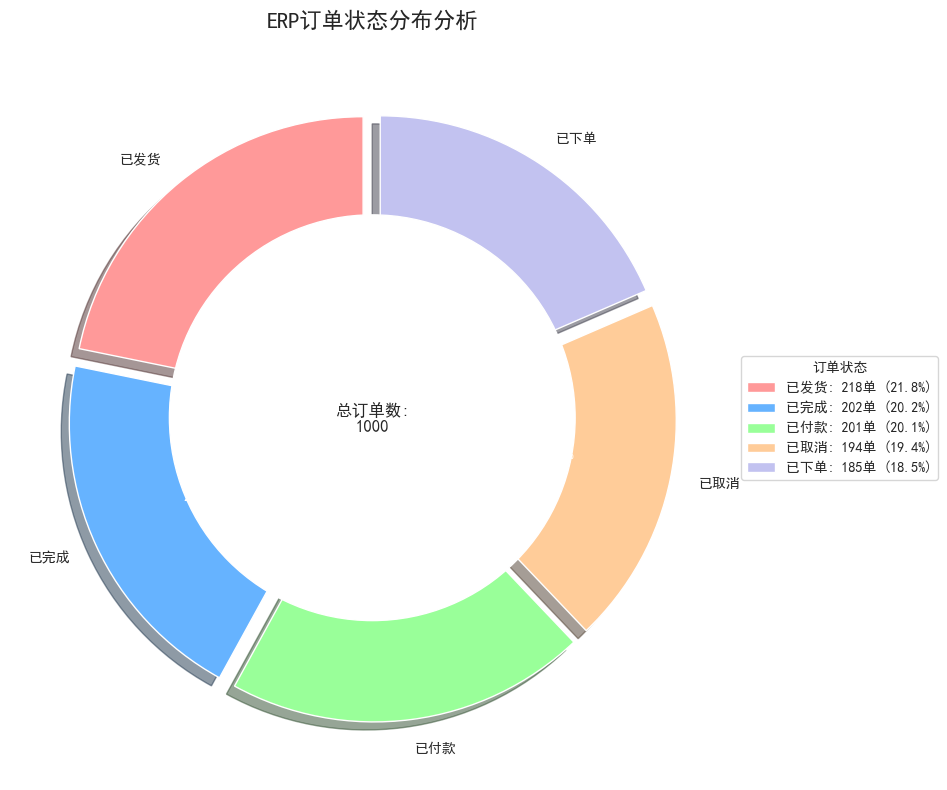


=== 订单状态统计 ===
已发货: 218单 (21.8%)
已完成: 202单 (20.2%)
已付款: 201单 (20.1%)
已取消: 194单 (19.4%)
已下单: 185单 (18.5%)

总订单数: 1000单


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("数据读取成功！")
    print(f"数据形状: {df.shape}")
    
    status_counts = df['status'].value_counts()
    
    plt.figure(figsize=(10, 8))
    
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
    
    wedges, texts, autotexts = plt.pie(
        status_counts.values, 
        labels=status_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(status_counts)],
        shadow=True,
        explode=[0.05] * len(status_counts)
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    plt.title('ERP订单状态分布分析', fontsize=16, fontweight='bold', pad=20)
    
    plt.legend(
        wedges, 
        [f'{label}: {count}单 ({percentage:.1f}%)' 
         for label, count, percentage in zip(
             status_counts.index, 
             status_counts.values, 
             status_counts.values / status_counts.values.sum() * 100
         )],
        title="订单状态",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.text(0, 0, f'总订单数:\n{len(df)}', 
             ha='center', va='center', 
             fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    
    plt.show()
    
    print("\n=== 订单状态统计 ===")
    for status, count in status_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{status}: {count}单 ({percentage:.1f}%)")
    
    print(f"\n总订单数: {len(df)}单")
    
except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
    print("请检查文件路径是否正确")
    
except Exception as e:
    print(f"处理数据时出现错误: {e}")
    print("请检查Excel文件格式和数据完整性")

数据读取成功！
数据形状: (1000, 31)


C:\Users\HP\AppData\Local\Temp\ipykernel_84268\4088179750.py:82: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  plt.tight_layout()
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


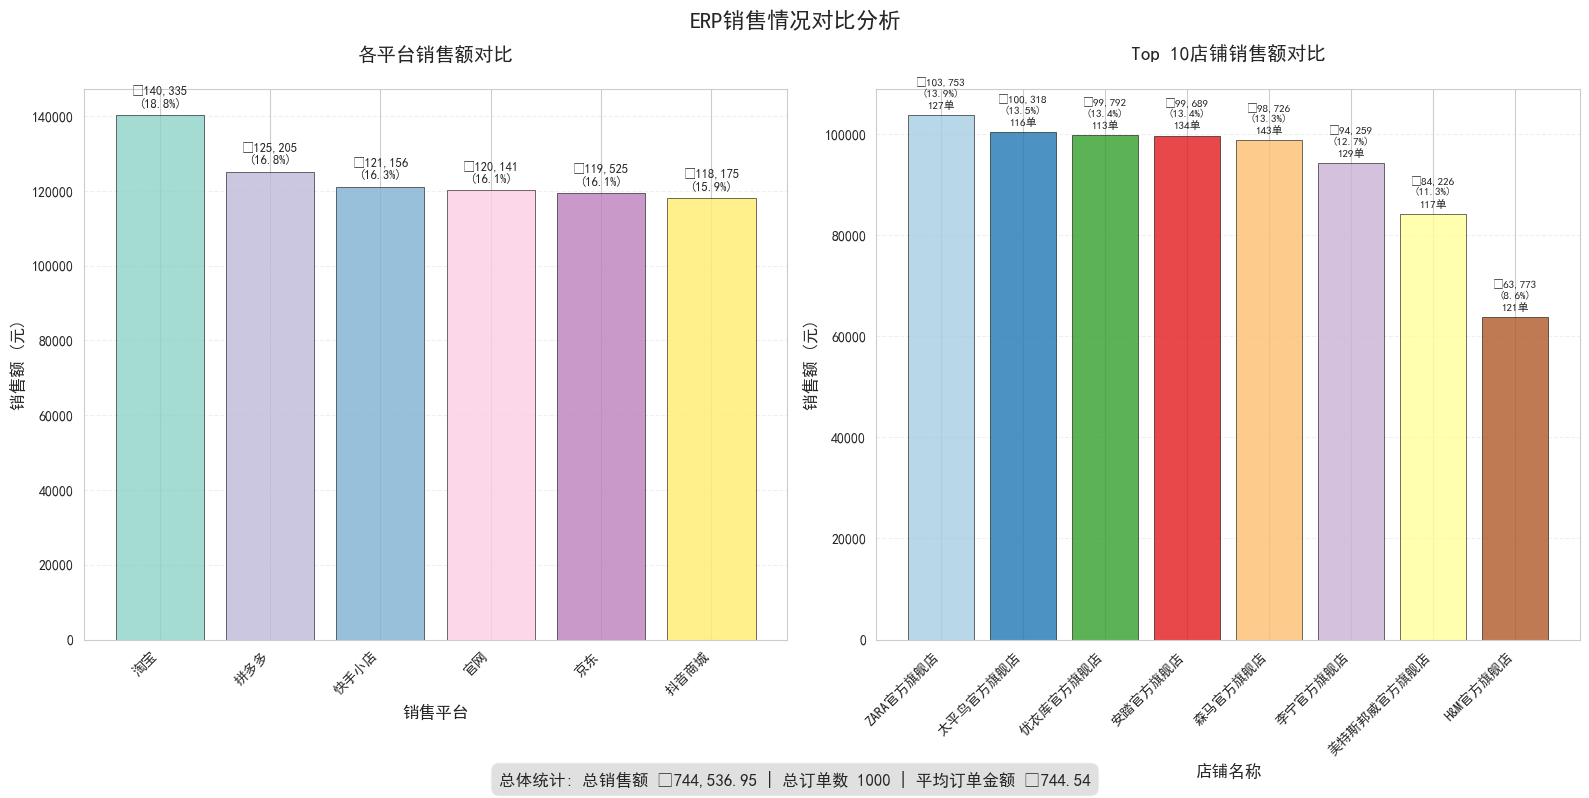

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("数据读取成功！")
    print(f"数据形状: {df.shape}")
    
    platform_sales = df.groupby('platform').agg({
        'paid_amount': 'sum',
        'id': 'count',
        'quantity': 'sum'
    }).rename(columns={'id': 'order_count', 'paid_amount': 'total_sales'})
    
    platform_sales = platform_sales.sort_values('total_sales', ascending=False)
    
    store_sales = df.groupby('store_name').agg({
        'paid_amount': 'sum',
        'id': 'count',
        'quantity': 'sum'
    }).rename(columns={'id': 'order_count', 'paid_amount': 'total_sales'})
    
    top_stores = store_sales.sort_values('total_sales', ascending=False).head(10)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('ERP销售情况对比分析', fontsize=16, fontweight='bold', y=0.98)
    
    platforms = platform_sales.index
    sales_amounts = platform_sales['total_sales']
    order_counts = platform_sales['order_count']
    
    total_sales = sales_amounts.sum()
    sales_percentages = [(amount / total_sales * 100) for amount in sales_amounts]
    
    bars1 = ax1.bar(range(len(platforms)), sales_amounts, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(platforms))),
                   alpha=0.8, edgecolor='black', linewidth=0.5)
    
    for i, (bar, amount, percentage) in enumerate(zip(bars1, sales_amounts, sales_percentages)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(sales_amounts)*0.01,
                f'¥{amount:,.0f}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax1.set_xlabel('销售平台', fontsize=12, fontweight='bold')
    ax1.set_ylabel('销售额 (元)', fontsize=12, fontweight='bold')
    ax1.set_title('各平台销售额对比', fontsize=14, fontweight='bold', pad=20)
    ax1.set_xticks(range(len(platforms)))
    ax1.set_xticklabels(platforms, rotation=45, ha='right')
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    stores = top_stores.index
    store_sales_amounts = top_stores['total_sales']
    store_order_counts = top_stores['order_count']
    
    store_sales_percentages = [(amount / total_sales * 100) for amount in store_sales_amounts]
    
    bars2 = ax2.bar(range(len(stores)), store_sales_amounts, 
                   color=plt.cm.Paired(np.linspace(0, 1, len(stores))),
                   alpha=0.8, edgecolor='black', linewidth=0.5)
    
    for i, (bar, amount, percentage, count) in enumerate(zip(bars2, store_sales_amounts, store_sales_percentages, store_order_counts)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(store_sales_amounts)*0.01,
                f'¥{amount:,.0f}\n({percentage:.1f}%)\n{count}单',
                ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax2.set_xlabel('店铺名称', fontsize=12, fontweight='bold')
    ax2.set_ylabel('销售额 (元)', fontsize=12, fontweight='bold')
    ax2.set_title('Top 10店铺销售额对比', fontsize=14, fontweight='bold', pad=20)
    ax2.set_xticks(range(len(stores)))
    ax2.set_xticklabels(stores, rotation=45, ha='right')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    plt.figtext(0.5, 0.01, 
               f'总体统计: 总销售额 ¥{df["paid_amount"].sum():,.2f} | 总订单数 {len(df)} | 平均订单金额 ¥{df["paid_amount"].mean():,.2f}',
               ha='center', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))
    
    plt.show()
 
except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
    print("请检查文件路径是否正确")
    
except Exception as e:
    print(f"处理数据时出现错误: {e}")
    import traceback
    traceback.print_exc()
    print("请检查Excel文件格式和数据完整性")

数据读取成功！


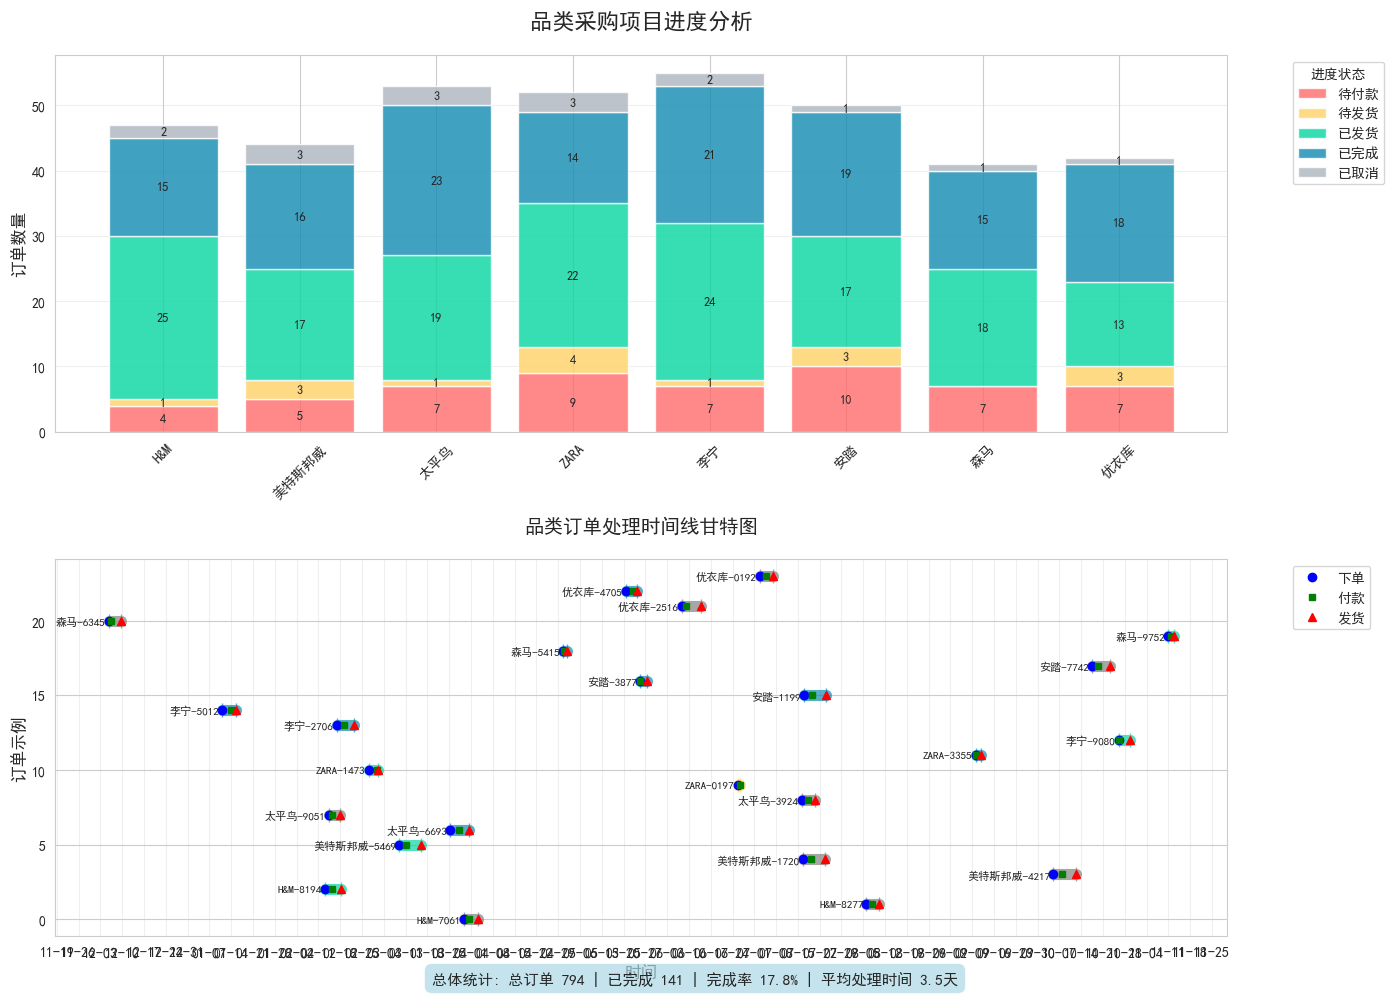

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("数据读取成功！")
    
    df['order_time'] = pd.to_datetime(df['order_time'])
    df['payment_date'] = pd.to_datetime(df['payment_date'])
    df['shipping_date'] = pd.to_datetime(df['shipping_date'], errors='coerce')
    
    df['category'] = df['product_name'].str.split(' ').str[0]
    
    df = df.dropna(subset=['order_time', 'payment_date'])
    
    df['process_duration'] = (df['shipping_date'] - df['order_time']).dt.days
    df['payment_duration'] = (df['payment_date'] - df['order_time']).dt.days
    
    def get_status(row):
        if pd.isna(row['shipping_date']):
            if row['status'] in ['已取消', '已取消    ']:
                return '已取消'
            elif row['status'] in ['已付款', '已付款    ']:
                return '待发货'
            else:
                return '待付款'
        else:
            if row['status'] in ['已发货', '已发货    ']:
                return '已发货'
            elif row['status'] in ['已完成', '已完成    ']:
                return '已完成'
            else:
                return '进行中'
    
    df['progress_status'] = df.apply(get_status, axis=1)
    
    top_categories = df['category'].value_counts().head(8).index.tolist()
    df_filtered = df[df['category'].isin(top_categories)].copy()
    
    gantt_data = []
    for category in top_categories:
        category_orders = df_filtered[df_filtered['category'] == category]
        status_counts = category_orders['progress_status'].value_counts()
        total_orders = len(category_orders)
        
        gantt_data.append({
            'category': category,
            '总订单数': total_orders,
            '待付款': status_counts.get('待付款', 0),
            '待发货': status_counts.get('待发货', 0),
            '已发货': status_counts.get('已发货', 0),
            '已完成': status_counts.get('已完成', 0),
            '已取消': status_counts.get('已取消', 0)
        })
    
    gantt_df = pd.DataFrame(gantt_data)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    categories = gantt_df['category']
    status_colors = {
        '待付款': '#ff6b6b',
        '待发货': '#ffd166',
        '已发货': '#06d6a0',
        '已完成': '#118ab2',
        '已取消': '#adb5bd'
    }
    
    bottoms = np.zeros(len(categories))
    
    for status, color in status_colors.items():
        counts = gantt_df[status]
        ax1.bar(categories, counts, bottom=bottoms, 
               label=status, color=color, alpha=0.8, edgecolor='white', linewidth=1)
        
        for i, (category, count, bottom_val) in enumerate(zip(categories, counts, bottoms)):
            if count > 0:
                ax1.text(i, bottom_val + count/2, str(int(count)), 
                        ha='center', va='center', fontweight='bold', fontsize=9)
        
        bottoms += counts
    
    ax1.set_ylabel('订单数量', fontsize=12, fontweight='bold')
    ax1.set_title('品类采购项目进度分析', fontsize=16, fontweight='bold', pad=20)
    ax1.legend(title='进度状态', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(axis='y', alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    ax2.clear()
    
    sample_orders = []
    for category in top_categories:
        cat_orders = df_filtered[df_filtered['category'] == category].head(3)
        sample_orders.append(cat_orders)
    
    if sample_orders:
        sample_df = pd.concat(sample_orders, ignore_index=True)
        
        y_positions = range(len(sample_df))
        
        for i, (idx, row) in enumerate(sample_df.iterrows()):
            order_label = f"{row['category']}-{row['online_order_number'][-4:]}"
            
            order_time = row['order_time']
            payment_time = row['payment_date']
            shipping_time = row['shipping_date'] if not pd.isna(row['shipping_date']) else None
            
            if not pd.isna(shipping_time):
                ax2.plot([order_time, shipping_time], [i, i], 
                        color=status_colors.get(row['progress_status'], 'gray'), 
                        linewidth=8, alpha=0.7, marker='|', markersize=10)
                
                ax2.plot(order_time, i, 'o', color='blue', markersize=6, label='下单' if i == 0 else "")
                ax2.plot(payment_time, i, 's', color='green', markersize=5, label='付款' if i == 0 else "")
                ax2.plot(shipping_time, i, '^', color='red', markersize=6, label='发货' if i == 0 else "")
            else:
                end_time = payment_time if not pd.isna(payment_time) else order_time + pd.Timedelta(days=5)
                ax2.plot([order_time, end_time], [i, i], 
                        color=status_colors.get(row['progress_status'], 'gray'), 
                        linewidth=8, alpha=0.7, marker='|', markersize=10)
                
                ax2.plot(order_time, i, 'o', color='blue', markersize=6, label='下单' if i == 0 else "")
                ax2.plot(payment_time, i, 's', color='green', markersize=5, label='付款' if i == 0 else "")
            
            ax2.text(order_time - pd.Timedelta(days=1), i, order_label, 
                    va='center', ha='right', fontsize=8)
    
    ax2.set_xlabel('时间', fontsize=12, fontweight='bold')
    ax2.set_ylabel('订单示例', fontsize=12, fontweight='bold')
    ax2.set_title('品类订单处理时间线甘特图', fontsize=14, fontweight='bold', pad=20)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(axis='x', alpha=0.3)
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
    
    plt.tight_layout()
    
    total_orders = len(df_filtered)
    completed_orders = len(df_filtered[df_filtered['progress_status'] == '已完成'])
    completion_rate = (completed_orders / total_orders) * 100 if total_orders > 0 else 0
    
    plt.figtext(0.5, 0.01, 
               f'总体统计: 总订单 {total_orders} | 已完成 {completed_orders} | 完成率 {completion_rate:.1f}% | 平均处理时间 {df_filtered["process_duration"].mean():.1f}天',
               ha='center', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))
    
    plt.show()
    

except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
    print("请检查文件路径是否正确")
    
except Exception as e:
    print(f"处理数据时出现错误: {e}")
    import traceback
    traceback.print_exc()

数据读取成功！
数据形状: (1000, 31)


C:\Users\HP\AppData\Local\Temp\ipykernel_84268\4117535846.py:125: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  plt.tight_layout()
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


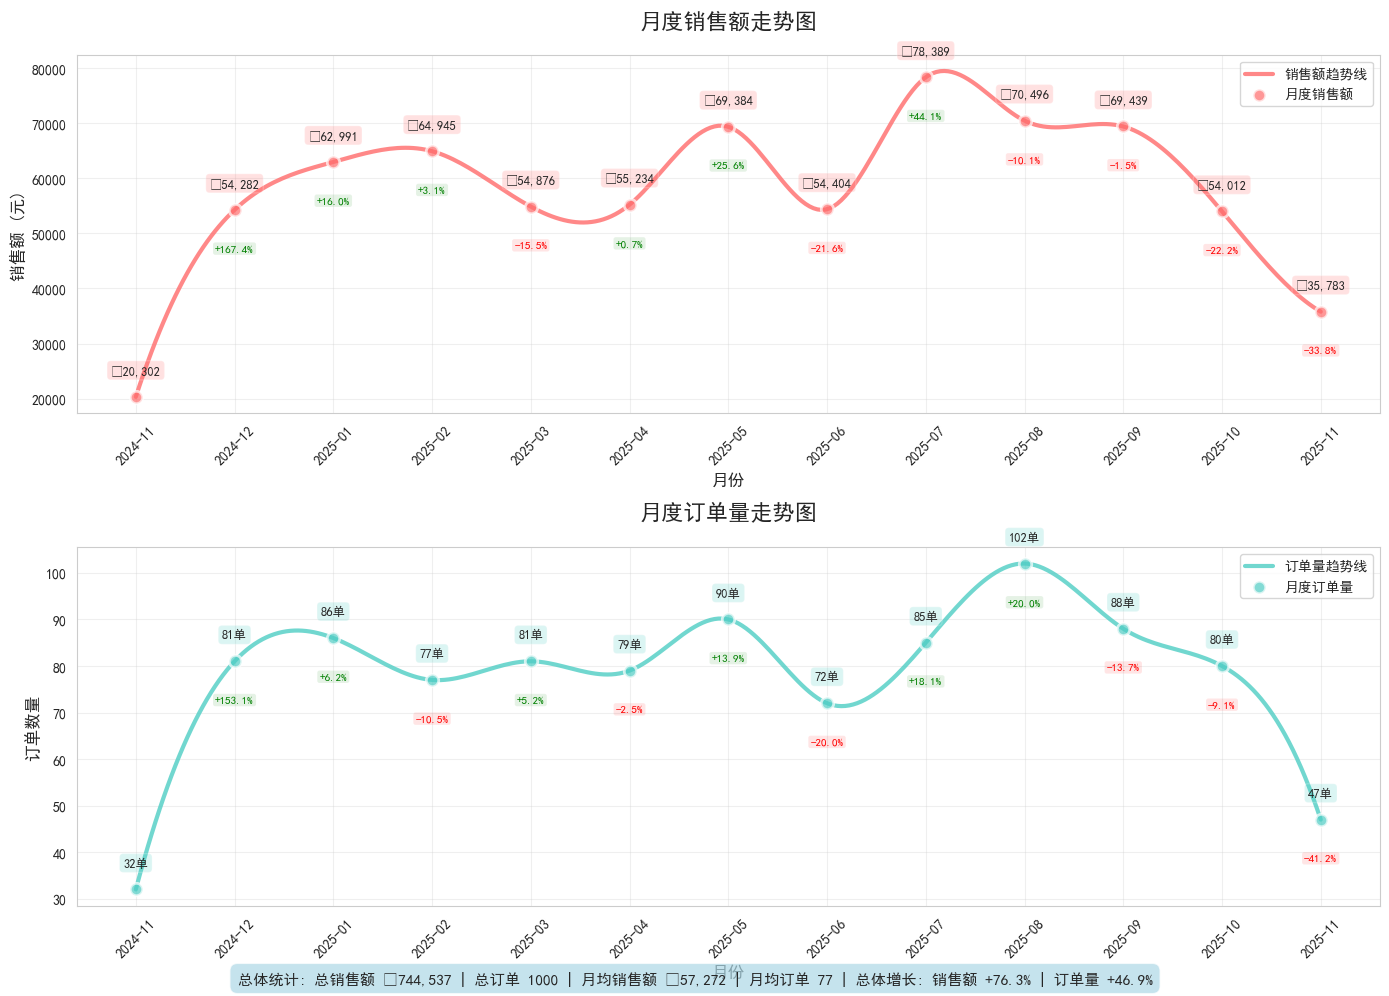

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import seaborn as sns
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("数据读取成功！")
    print(f"数据形状: {df.shape}")
    
    df['order_time'] = pd.to_datetime(df['order_time'])
    df['payment_date'] = pd.to_datetime(df['payment_date'])
    
    df['order_year_month'] = df['order_time'].dt.to_period('M')
    df['payment_year_month'] = df['payment_date'].dt.to_period('M')
    
    monthly_sales = df.groupby('order_year_month').agg({
        'paid_amount': 'sum',
        'id': 'count',
        'quantity': 'sum'
    }).rename(columns={'id': 'order_count', 'paid_amount': 'total_sales'})
    
    monthly_sales = monthly_sales.reset_index()
    monthly_sales['month_str'] = monthly_sales['order_year_month'].astype(str)
    
    monthly_sales['sales_growth'] = monthly_sales['total_sales'].pct_change() * 100
    monthly_sales['order_growth'] = monthly_sales['order_count'].pct_change() * 100
    
    x = np.arange(len(monthly_sales))
    x_smooth = np.linspace(x.min(), x.max(), 300)
    
    if len(monthly_sales) > 3:
        spl_sales = make_interp_spline(x, monthly_sales['total_sales'], k=3)
        sales_smooth = spl_sales(x_smooth)
    else:
        sales_smooth = np.interp(x_smooth, x, monthly_sales['total_sales'])
    
    if len(monthly_sales) > 3:
        spl_orders = make_interp_spline(x, monthly_sales['order_count'], k=3)
        orders_smooth = spl_orders(x_smooth)
    else:
        orders_smooth = np.interp(x_smooth, x, monthly_sales['order_count'])
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    ax1.plot(x_smooth, sales_smooth, color='#FF6B6B', linewidth=3, 
             label='销售额趋势线', alpha=0.8, zorder=2)
    
    ax1.scatter(x, monthly_sales['total_sales'], color='#FF6B6B', 
               s=80, alpha=0.7, edgecolors='white', linewidth=2, zorder=3,
               label='月度销售额')
    
    for i, (month, sales, growth) in enumerate(zip(monthly_sales['month_str'], 
                                                  monthly_sales['total_sales'], 
                                                  monthly_sales['sales_growth'])):
        ax1.annotate(f'¥{sales:,.0f}', 
                    xy=(i, sales), 
                    xytext=(0, 15),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='#FF6B6B', alpha=0.2))
        
        if i > 0 and not pd.isna(growth):
            color = 'green' if growth > 0 else 'red'
            ax1.annotate(f'{growth:+.1f}%', 
                        xy=(i, sales), 
                        xytext=(0, -25),
                        textcoords='offset points',
                        ha='center', va='top',
                        fontsize=8, fontweight='bold', color=color,
                        bbox=dict(boxstyle='round,pad=0.2', facecolor=color, alpha=0.1))
    
    ax1.set_title('月度销售额走势图', fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('销售额 (元)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('月份', fontsize=12, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(monthly_sales['month_str'], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(x_smooth, orders_smooth, color='#4ECDC4', linewidth=3, 
             label='订单量趋势线', alpha=0.8, zorder=2)
    
    ax2.scatter(x, monthly_sales['order_count'], color='#4ECDC4', 
               s=80, alpha=0.7, edgecolors='white', linewidth=2, zorder=3,
               label='月度订单量')
    
    for i, (month, orders, growth) in enumerate(zip(monthly_sales['month_str'], 
                                                   monthly_sales['order_count'], 
                                                   monthly_sales['order_growth'])):
        ax2.annotate(f'{orders:.0f}单', 
                    xy=(i, orders), 
                    xytext=(0, 15),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='#4ECDC4', alpha=0.2))
        
        if i > 0 and not pd.isna(growth):
            color = 'green' if growth > 0 else 'red'
            ax2.annotate(f'{growth:+.1f}%', 
                        xy=(i, orders), 
                        xytext=(0, -25),
                        textcoords='offset points',
                        ha='center', va='top',
                        fontsize=8, fontweight='bold', color=color,
                        bbox=dict(boxstyle='round,pad=0.2', facecolor=color, alpha=0.1))
    
    ax2.set_title('月度订单量走势图', fontsize=16, fontweight='bold', pad=20)
    ax2.set_ylabel('订单数量', fontsize=12, fontweight='bold')
    ax2.set_xlabel('月份', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(monthly_sales['month_str'], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    total_sales = monthly_sales['total_sales'].sum()
    total_orders = monthly_sales['order_count'].sum()
    avg_monthly_sales = monthly_sales['total_sales'].mean()
    avg_monthly_orders = monthly_sales['order_count'].mean()
    
    if len(monthly_sales) > 1:
        first_month_sales = monthly_sales['total_sales'].iloc[0]
        last_month_sales = monthly_sales['total_sales'].iloc[-1]
        overall_sales_growth = ((last_month_sales - first_month_sales) / first_month_sales) * 100
        
        first_month_orders = monthly_sales['order_count'].iloc[0]
        last_month_orders = monthly_sales['order_count'].iloc[-1]
        overall_orders_growth = ((last_month_orders - first_month_orders) / first_month_orders) * 100
    else:
        overall_sales_growth = 0
        overall_orders_growth = 0
    
    plt.figtext(0.5, 0.01, 
               f'总体统计: 总销售额 ¥{total_sales:,.0f} | 总订单 {total_orders} | '
               f'月均销售额 ¥{avg_monthly_sales:,.0f} | 月均订单 {avg_monthly_orders:.0f} | '
               f'总体增长: 销售额 {overall_sales_growth:+.1f}% | 订单量 {overall_orders_growth:+.1f}%',
               ha='center', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))
    
    plt.show()
    
except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
    print("请检查文件路径是否正确")
    
except Exception as e:
    print(f"处理数据时出现错误: {e}")
    import traceback
    traceback.print_exc()

数据读取成功！
数据形状: (1000, 31)


C:\Users\HP\AppData\Local\Temp\ipykernel_84268\3375499720.py:131: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  plt.tight_layout()
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


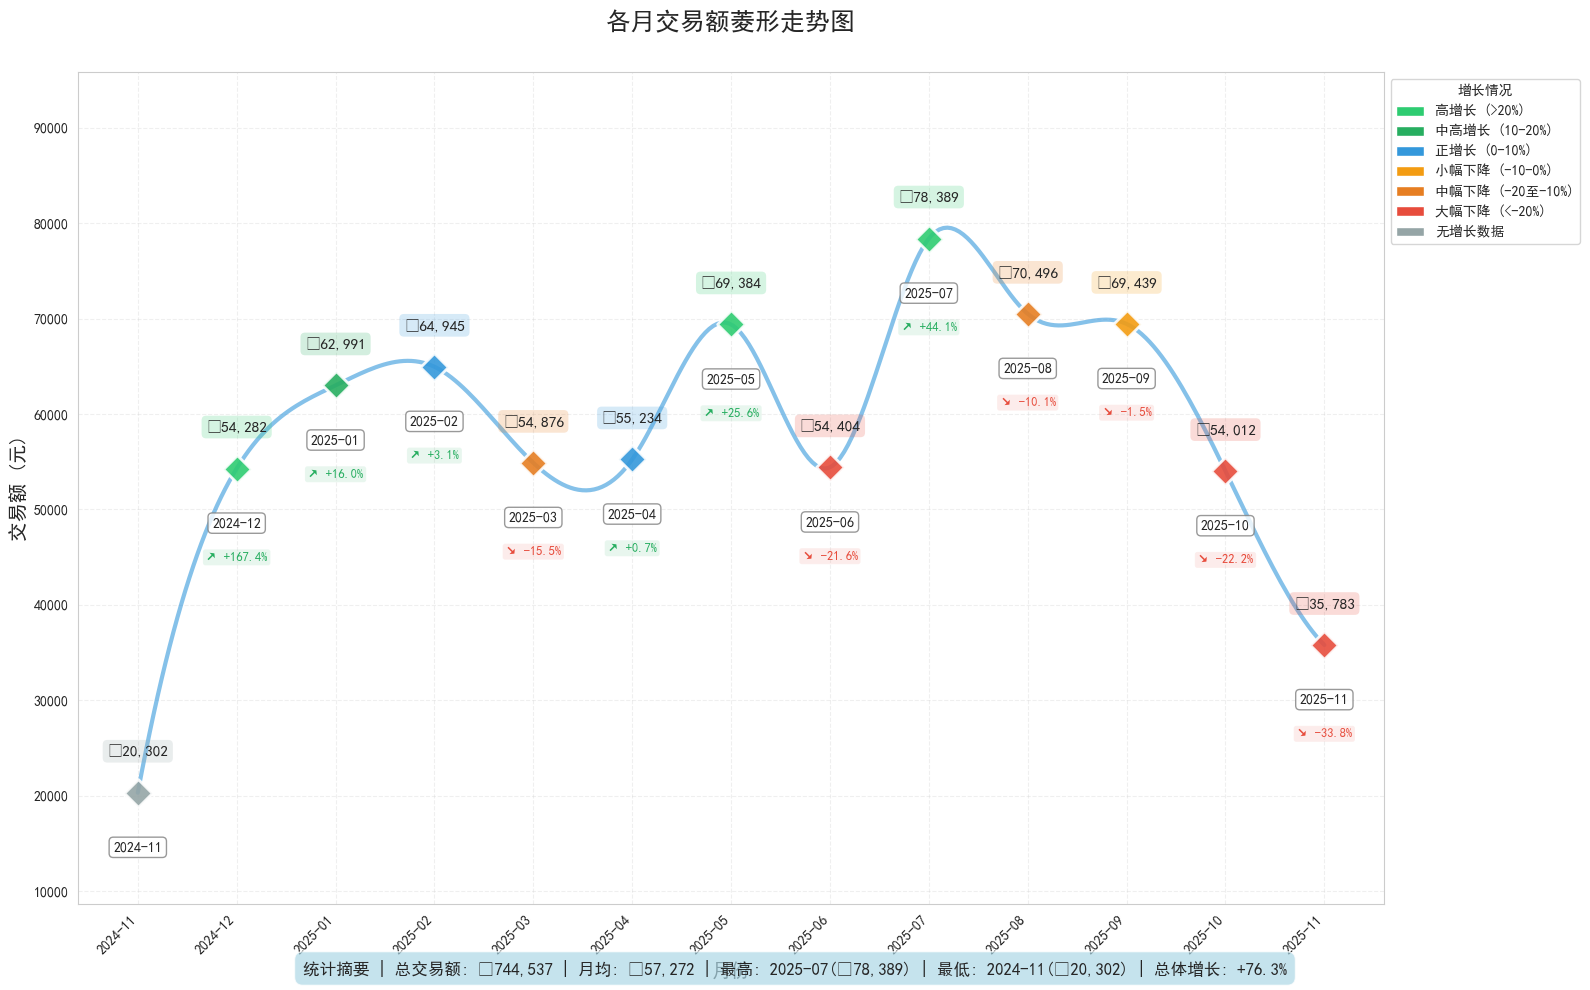

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import seaborn as sns
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"

try:
    df = pd.read_excel(file_path)
    print("数据读取成功！")
    print(f"数据形状: {df.shape}")
    
    df['order_time'] = pd.to_datetime(df['order_time'])
    df['payment_date'] = pd.to_datetime(df['payment_date'])
    
    df['order_year_month'] = df['order_time'].dt.to_period('M')
    df['payment_year_month'] = df['payment_date'].dt.to_period('M')
    
    monthly_sales = df.groupby('order_year_month').agg({
        'paid_amount': 'sum',
        'id': 'count',
        'quantity': 'sum'
    }).rename(columns={'id': 'order_count', 'paid_amount': 'total_sales'})
    
    monthly_sales = monthly_sales.reset_index()
    monthly_sales['month_str'] = monthly_sales['order_year_month'].astype(str)
    
    monthly_sales['sales_growth'] = monthly_sales['total_sales'].pct_change() * 100
    
    colors = []
    for growth in monthly_sales['sales_growth']:
        if pd.isna(growth):
            colors.append('#95a5a6')
        elif growth > 20:
            colors.append('#2ecc71')
        elif growth > 10:
            colors.append('#27ae60')
        elif growth > 0:
            colors.append('#3498db')
        elif growth > -10:
            colors.append('#f39c12')
        elif growth > -20:
            colors.append('#e67e22')
        else:
            colors.append('#e74c3c')
    
    x = np.arange(len(monthly_sales))
    
    if len(monthly_sales) > 1:
        x_smooth = np.linspace(x.min(), x.max(), 300)
        if len(monthly_sales) > 3:
            spl = make_interp_spline(x, monthly_sales['total_sales'], k=3)
            y_smooth = spl(x_smooth)
        else:
            y_smooth = np.interp(x_smooth, x, monthly_sales['total_sales'])
    else:
        x_smooth = x
        y_smooth = monthly_sales['total_sales']
    
    fig, ax = plt.subplots(figsize=(16, 10))
    
    ax.plot(x_smooth, y_smooth, color='#3498db', linewidth=3, 
            alpha=0.6, label='销售趋势线', zorder=1)
    
    for i, (sales, growth, color) in enumerate(zip(monthly_sales['total_sales'], 
                                                  monthly_sales['sales_growth'], 
                                                  colors)):
        marker = ax.scatter(i, sales, marker='D', s=200, color=color, 
                           edgecolors='white', linewidth=2, zorder=3,
                           alpha=0.9)
        
        ax.annotate(f'¥{sales:,.0f}', 
                   xy=(i, sales), 
                   xytext=(0, 25),
                   textcoords='offset points',
                   ha='center', va='bottom',
                   fontsize=11, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.2, edgecolor='none'))
        
        ax.annotate(monthly_sales['month_str'].iloc[i], 
                   xy=(i, sales), 
                   xytext=(0, -35),
                   textcoords='offset points',
                   ha='center', va='top',
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
        
        if i > 0 and not pd.isna(growth):
            growth_color = '#27ae60' if growth > 0 else '#e74c3c'
            growth_symbol = '↗' if growth > 0 else '↘'
            ax.annotate(f'{growth_symbol} {growth:+.1f}%', 
                       xy=(i, sales), 
                       xytext=(0, -60),
                       textcoords='offset points',
                       ha='center', va='top',
                       fontsize=9, fontweight='bold', color=growth_color,
                       bbox=dict(boxstyle='round,pad=0.2', facecolor=growth_color, alpha=0.1))
    
    ax.set_title('各月交易额菱形走势图', fontsize=18, fontweight='bold', pad=30)
    ax.set_ylabel('交易额 (元)', fontsize=14, fontweight='bold')
    ax.set_xlabel('月份', fontsize=14, fontweight='bold')
    
    ax.set_xticks(x)
    ax.set_xticklabels(monthly_sales['month_str'], rotation=45, ha='right')
    
    ax.grid(True, alpha=0.3, linestyle='--')
    
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2ecc71', label='高增长 (>20%)'),
        Patch(facecolor='#27ae60', label='中高增长 (10-20%)'),
        Patch(facecolor='#3498db', label='正增长 (0-10%)'),
        Patch(facecolor='#f39c12', label='小幅下降 (-10-0%)'),
        Patch(facecolor='#e67e22', label='中幅下降 (-20至-10%)'),
        Patch(facecolor='#e74c3c', label='大幅下降 (<-20%)'),
        Patch(facecolor='#95a5a6', label='无增长数据')
    ]
    ax.legend(handles=legend_elements, title='增长情况', 
              loc='upper left', bbox_to_anchor=(1, 1))
    
    y_min = monthly_sales['total_sales'].min()
    y_max = monthly_sales['total_sales'].max()
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.2 * y_range, y_max + 0.3 * y_range)
    
    plt.tight_layout()
    
    total_sales = monthly_sales['total_sales'].sum()
    avg_monthly_sales = monthly_sales['total_sales'].mean()
    max_sales = monthly_sales['total_sales'].max()
    min_sales = monthly_sales['total_sales'].min()
    max_month = monthly_sales.loc[monthly_sales['total_sales'].idxmax(), 'month_str']
    min_month = monthly_sales.loc[monthly_sales['total_sales'].idxmin(), 'month_str']
    
    if len(monthly_sales) > 1:
        first_month = monthly_sales['total_sales'].iloc[0]
        last_month = monthly_sales['total_sales'].iloc[-1]
        overall_growth = ((last_month - first_month) / first_month) * 100
    else:
        overall_growth = 0
    
    stats_text = (f'统计摘要 | 总交易额: ¥{total_sales:,.0f} | '
                  f'月均: ¥{avg_monthly_sales:,.0f} | '
                  f'最高: {max_month}(¥{max_sales:,.0f}) | '
                  f'最低: {min_month}(¥{min_sales:,.0f}) | '
                  f'总体增长: {overall_growth:+.1f}%')
    
    plt.figtext(0.5, 0.02, stats_text,
               ha='center', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))
    
    plt.show()

except FileNotFoundError:
    print(f"错误：找不到文件 {file_path}")
    print("请检查文件路径是否正确")
    
except Exception as e:
    print(f"处理数据时出现错误: {e}")
    import traceback
    traceback.print_exc()

数据列名：
['id', 'internal_order_number', 'online_order_number', 'store_name', 'full_channel_user_id', 'shipping_date', 'payment_date', 'payable_amount', 'paid_amount', 'status', 'consignee', 'spu', 'order_time', 'province', 'city', 'platform', 'sub_order_number', 'online_sub_order_number', 'original_online_order_number', 'sku', 'quantity', 'unit_price', 'product_name', 'color_and_spec', 'product_amount', 'original_price', 'is_gift', 'sub_order_status', 'refund_status', 'registered_quantity', 'actual_refund_quantity']

数据形状：(1000, 31)

平台列表：['快手小店' '京东' '拼多多' '官网' '抖音商城' '淘宝']


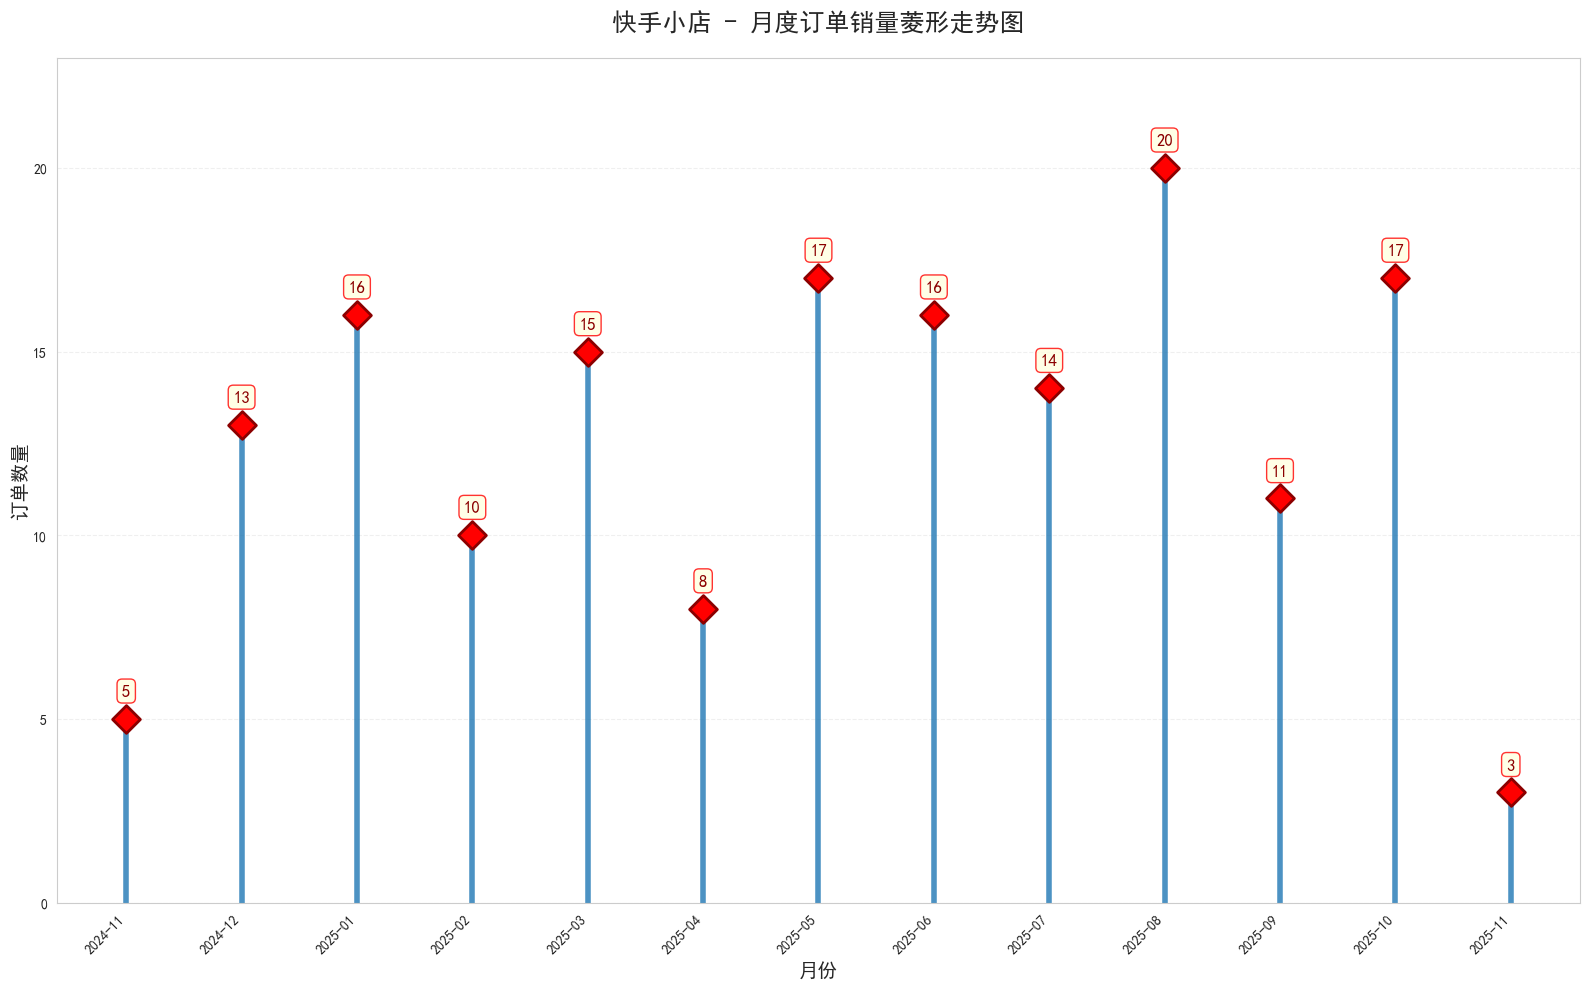

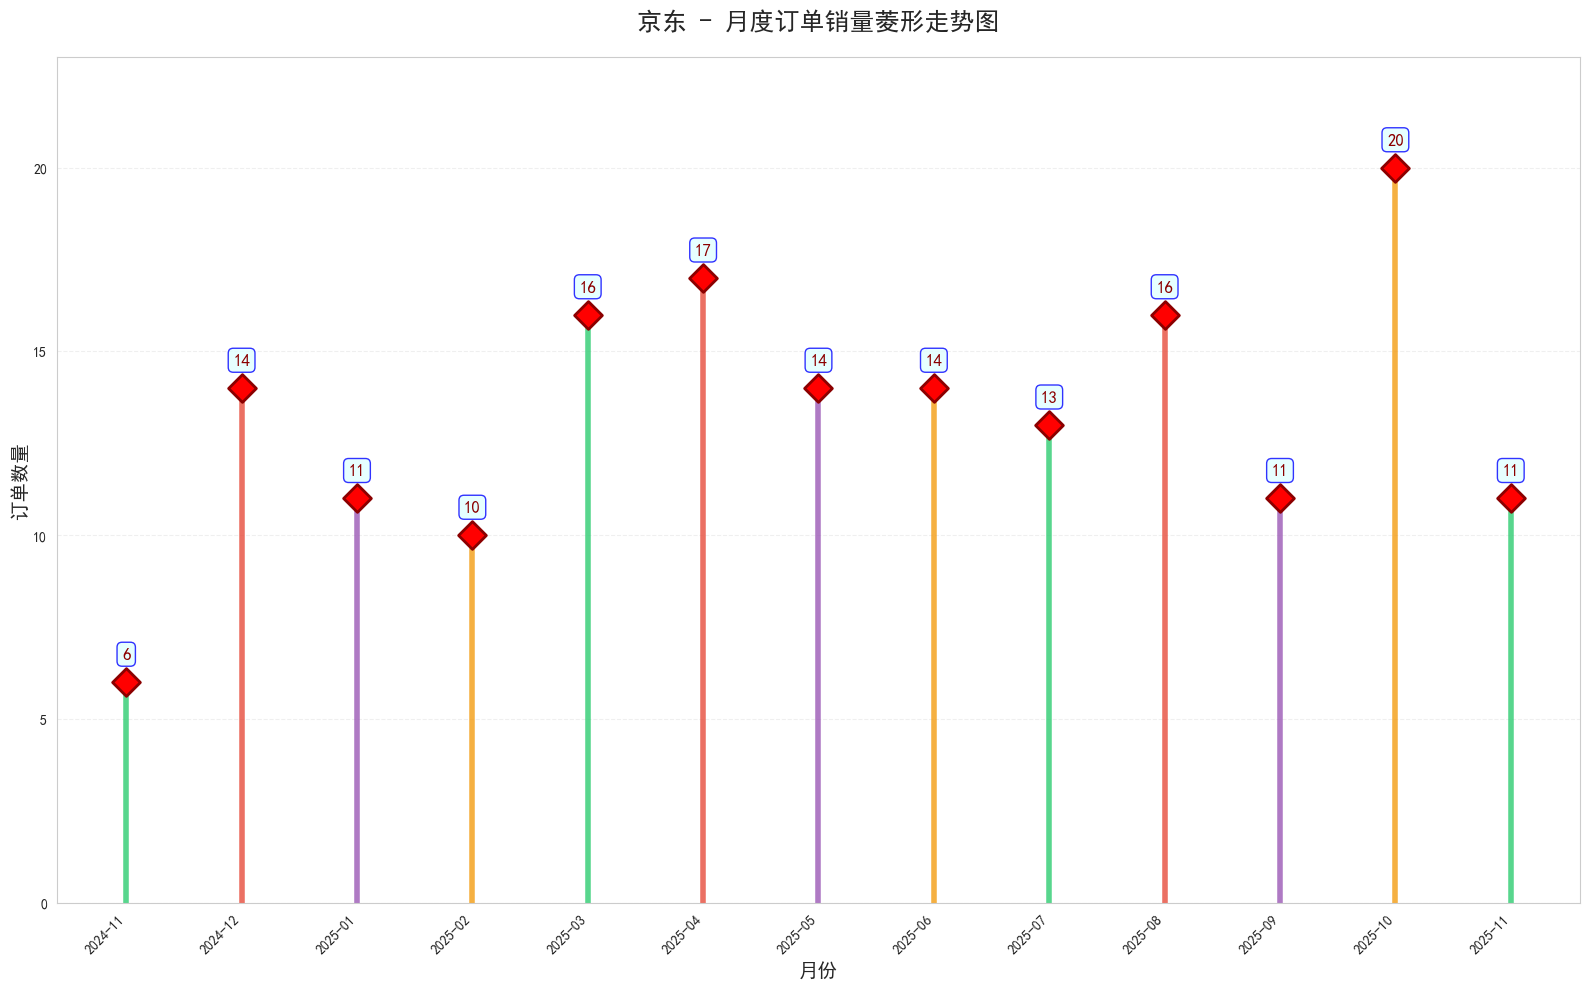

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"
df = pd.read_excel(file_path)

print("数据列名：")
print(df.columns.tolist())
print(f"\n数据形状：{df.shape}")
print(f"\n平台列表：{df['platform'].unique()}")

df['order_time'] = pd.to_datetime(df['order_time'])
df['order_year_month'] = df['order_time'].dt.to_period('M')  # 格式为年月，如 2025-01

platform_monthly_sales = df.groupby(['platform', 'order_year_month']).size().reset_index(name='order_count')

target_platform = '快手小店'
platform_data = platform_monthly_sales[platform_monthly_sales['platform'] == target_platform]

if len(platform_data) == 0:
    available_platforms = platform_monthly_sales['platform'].unique()
    if len(available_platforms) > 0:
        target_platform = available_platforms[0]
        platform_data = platform_monthly_sales[platform_monthly_sales['platform'] == target_platform]
        print(f"快手小店无数据，改为分析平台: {target_platform}")

fig, ax = plt.subplots(figsize=(16, 10))

if len(platform_data) > 0:

    platform_data = platform_data.sort_values('order_year_month')

    months = platform_data['order_year_month'].astype(str).tolist()
    order_counts = platform_data['order_count'].tolist()

    x_positions = range(len(months))
    for i, (x, count) in enumerate(zip(x_positions, order_counts)):

        ax.vlines(x=x, ymin=0, ymax=count, color='#1f77b4', linewidth=4, alpha=0.8)
        
        ax.scatter(x, count, marker='D', s=200, color='red', edgecolors='darkred', linewidths=2, zorder=5)

        ax.annotate(f'{count}', 
                   xy=(x, count), 
                   xytext=(0, 15), 
                   textcoords='offset points',
                   ha='center', 
                   va='bottom',
                   fontsize=12,
                   fontweight='bold',
                   color='darkred',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8, edgecolor='red'))

    ax.set_xticks(x_positions)
    ax.set_xticklabels(months, rotation=45, ha='right')

    ax.set_title(f'{target_platform} - 月度订单销量菱形走势图', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('月份', fontsize=14)
    ax.set_ylabel('订单数量', fontsize=14)

    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.grid(False, axis='x')

    max_count = max(order_counts) if order_counts else 0
    ax.set_ylim(bottom=0, top=max_count * 1.15)

    plt.tight_layout()
    
    plt.show()
      
   
else:
    print(f"平台 '{target_platform}' 没有找到数据")

target_platform = '京东' 

platform_data = platform_monthly_sales[platform_monthly_sales['platform'] == target_platform]

fig, ax = plt.subplots(figsize=(16, 10))

if len(platform_data) > 0:
    platform_data = platform_data.sort_values('order_year_month')
    months = platform_data['order_year_month'].astype(str).tolist()
    order_counts = platform_data['order_count'].tolist()
    x_positions = range(len(months))

    colors = ['#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']
    color_idx = 0
    
    for i, (x, count) in enumerate(zip(x_positions, order_counts)):
        line_color = colors[color_idx % len(colors)]
        color_idx += 1
        
        ax.vlines(x=x, ymin=0, ymax=count, color=line_color, linewidth=4, alpha=0.8)
        ax.scatter(x, count, marker='D', s=200, color='red', edgecolors='darkred', linewidths=2, zorder=5)
        ax.annotate(f'{count}', 
                   xy=(x, count), 
                   xytext=(0, 15), 
                   textcoords='offset points',
                   ha='center', 
                   va='bottom',
                   fontsize=12,
                   fontweight='bold',
                   color='darkred',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcyan', alpha=0.8, edgecolor='blue'))
    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(months, rotation=45, ha='right')
    ax.set_title(f'{target_platform} - 月度订单销量菱形走势图', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('月份', fontsize=14)
    ax.set_ylabel('订单数量', fontsize=14)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.grid(False, axis='x')
    
    max_count = max(order_counts) if order_counts else 0
    ax.set_ylim(bottom=0, top=max_count * 1.15)
    
    plt.tight_layout()
    plt.show()
    

数据包含列名： ['id', 'internal_order_number', 'online_order_number', 'store_name', 'full_channel_user_id', 'shipping_date', 'payment_date', 'payable_amount', 'paid_amount', 'status', 'consignee', 'spu', 'order_time', 'province', 'city', 'platform', 'sub_order_number', 'online_sub_order_number', 'original_online_order_number', 'sku', 'quantity', 'unit_price', 'product_name', 'color_and_spec', 'product_amount', 'original_price', 'is_gift', 'sub_order_status', 'refund_status', 'registered_quantity', 'actual_refund_quantity']


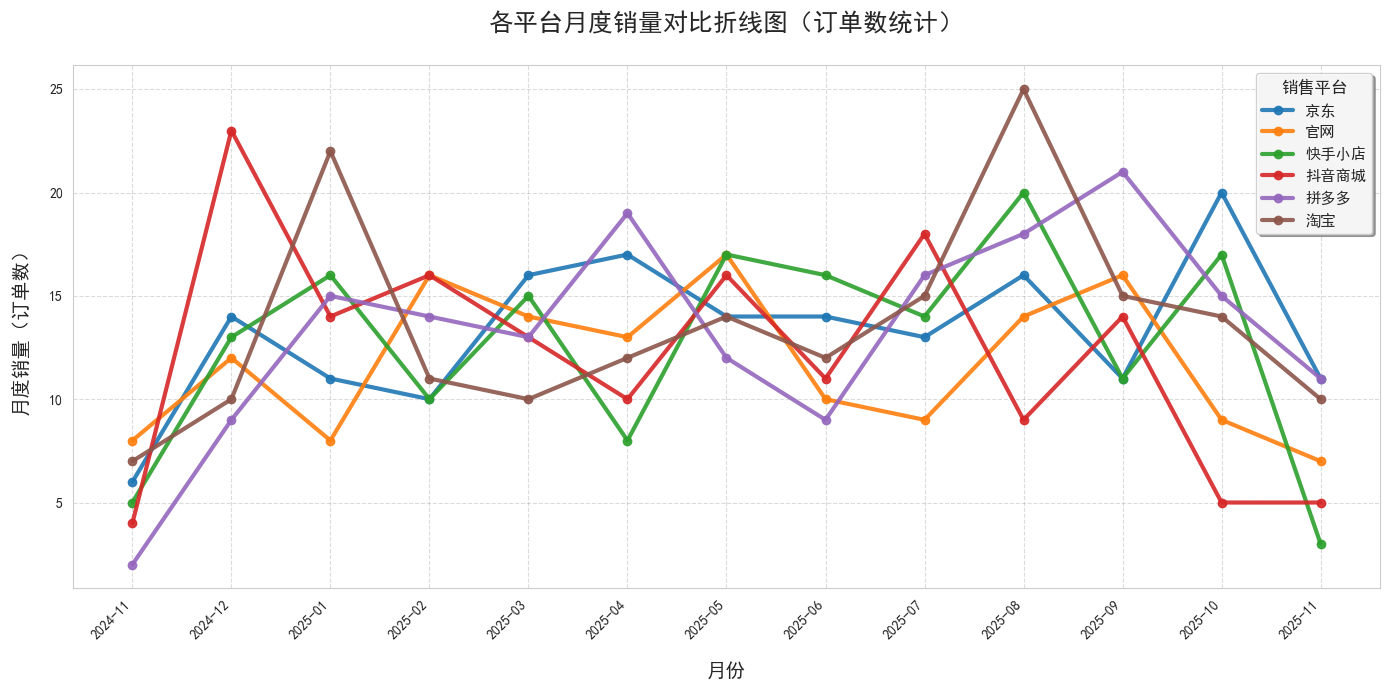

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "D:\\python\\新建文件夹\\erp_order_data.xlsx"
df = pd.read_excel(file_path)

print("数据包含列名：", df.columns.tolist())

order_id_col = "online_order_number"
platform_col = "platform"
date_col = "order_time"

df_clean = df[[order_id_col, platform_col, date_col]].dropna()
df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')
df_clean = df_clean.dropna(subset=[date_col])

df_clean['年月'] = df_clean[date_col].dt.to_period('M')

monthly_sales = df_clean.groupby(
    ['年月', platform_col]
)[order_id_col].count().reset_index()

monthly_sales.rename(columns={order_id_col: "月度销量"}, inplace=True)
monthly_sales['年月_str'] = monthly_sales['年月'].astype(str)

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']

for i, platform in enumerate(monthly_sales[platform_col].unique()):
    platform_data = monthly_sales[monthly_sales[platform_col] == platform]
    platform_data = platform_data.sort_values('年月')
    
    ax.plot(
        platform_data['年月_str'],
        platform_data['月度销量'],
        label=platform,
        color=colors[i % len(colors)],
        linewidth=3,
        marker='o',
        markersize=6,
        alpha=0.9
    )

ax.set_title('各平台月度销量对比折线图（订单数统计）', fontsize=18, fontweight='bold', pad=25)
ax.set_xlabel('月份', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('月度销量（订单数）', fontsize=14, fontweight='bold', labelpad=15)

ax.set_xticks(range(0, len(monthly_sales['年月_str'].unique()), 1))
ax.set_xticklabels(monthly_sales['年月_str'].unique(), rotation=45, ha='right', fontsize=10)

ax.grid(True, linestyle='--', alpha=0.3, color='#888888', linewidth=0.8)

ax.legend(
    title='销售平台',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    bbox_to_anchor=(1, 1),
    frameon=True,
    shadow=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()

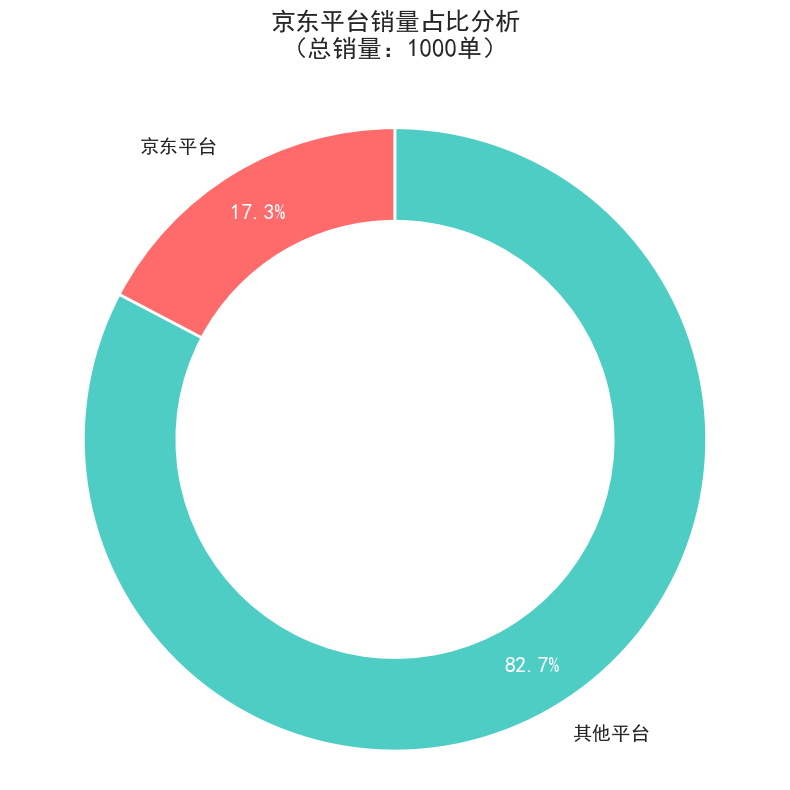

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\\python\\新建文件夹\\erp_order_data.xlsx"
df = pd.read_excel(file_path)

order_id_col = "online_order_number"
platform_col = "platform"
jd_platform_name = "京东"

df_clean = df[[order_id_col, platform_col]].dropna()
platform_sales = df_clean.groupby(platform_col)[order_id_col].count().reset_index()
platform_sales.rename(columns={order_id_col: "销量"}, inplace=True)

if jd_platform_name not in platform_sales[platform_col].values:
    raise ValueError(f"数据中未找到'{jd_platform_name}'平台，请确认平台列名或京东平台实际名称")

jd_sales = platform_sales[platform_sales[platform_col] == jd_platform_name]["销量"].values[0]
other_sales = platform_sales[platform_sales[platform_col] != jd_platform_name]["销量"].sum()

labels = [f"{jd_platform_name}平台", "其他平台"]
sizes = [jd_sales, other_sales]
total_sales = sum(sizes)

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#FF6B6B', '#4ECDC4']
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    labeldistance=1.1,
    wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2)
)

for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

ax.set_title(
    f'{jd_platform_name}平台销量占比分析\n（总销量：{total_sales}单）',
    fontsize=18,
    fontweight='bold',
    pad=30
)

ax.axis('equal')
plt.tight_layout()
plt.show()

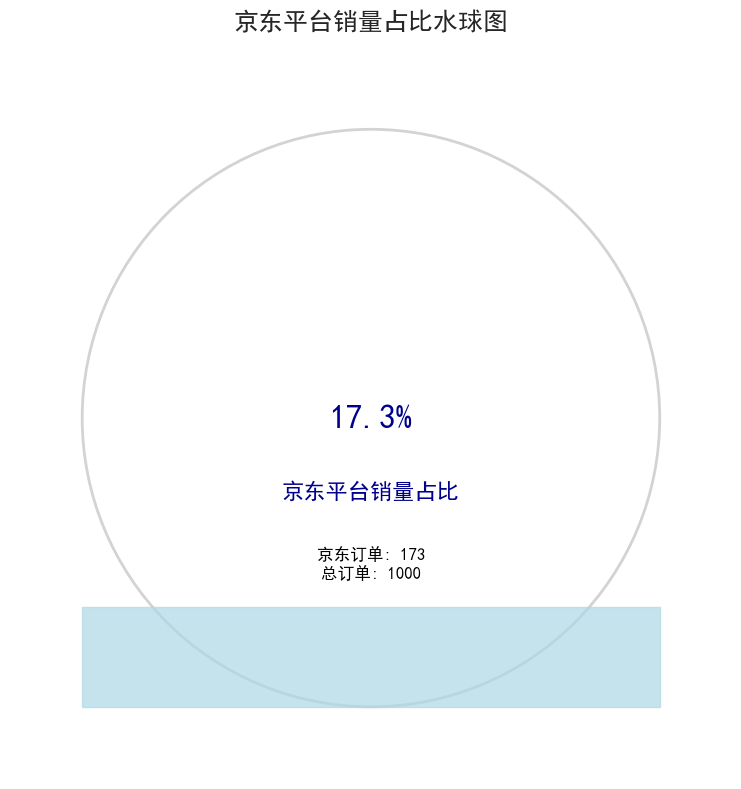

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r"D:\python\新建文件夹\erp_order_data.xlsx"
df = pd.read_excel(file_path)

df['order_time'] = pd.to_datetime(df['order_time'])

jd_orders = df[df['platform'] == '京东']
total_orders = len(df)
jd_orders_count = len(jd_orders)
jd_percentage = (jd_orders_count / total_orders) * 100

fig, ax = plt.subplots(figsize=(10, 8))

center_x, center_y = 0.5, 0.5
radius = 0.4

circle = plt.Circle((center_x, center_y), radius, fill=False, edgecolor='lightgray', linewidth=2)
ax.add_patch(circle)

water_level = jd_percentage / 100
water_height = 2 * radius * water_level

water_bottom = center_y - radius
water_top = water_bottom + water_height

water_rect = plt.Rectangle((center_x - radius, water_bottom), 
                          2 * radius, water_height, 
                          color='lightblue', alpha=0.7)
ax.add_patch(water_rect)

percentage_text = f'{jd_percentage:.1f}%'
ax.text(center_x, center_y, percentage_text, 
        fontsize=24, fontweight='bold', 
        ha='center', va='center', 
        color='darkblue')

ax.text(center_x, center_y - 0.1, '京东平台销量占比', 
        fontsize=16, 
        ha='center', va='center', 
        color='darkblue')

detail_text = f'京东订单: {jd_orders_count}\n总订单: {total_orders}'
ax.text(center_x, center_y - 0.2, detail_text, 
        fontsize=12, 
        ha='center', va='center', 
        color='black')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.title('京东平台销量占比水球图', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()